# Graphing - Matplotlib, Seaborn, Pandas #

Many of the examples in this notebook are adapted from <u>Pandas for Everyone: Python Data Analysis</u> by Daniel Y. Chen.

In [ ]:
# Import useful modules (libraries)
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# the next line is "magic" command for Jupyter notebooks that causes plots to be rendered directly into the Jupyter notebook
%matplotlib inline
# %matplotlib notebook

import seaborn as sns

## Matplotlib Terminology ##

`matplotlib` has many powerful features, but can be a little overwhelming with the options and terminology.  We will look at a few of the features, but there is a lot of documentation available online.

Here is a handy reference diagram to `matplotlib` terminology.  It is kind of cool that this diagram is entirely produced via `matplotlib`.

The code is from: https://matplotlib.org/stable/gallery/showcase/anatomy.html

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.patheffects import withStroke
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

royal_blue = [0, 20/256, 82/256]


# make the figure

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(7.5, 7.5))
ax = fig.add_axes([0.2, 0.17, 0.68, 0.7], aspect=1)

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter("{x:.2f}")

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0, length=10, labelsize=14)
ax.tick_params(which='minor', width=1.0, length=5, labelsize=10,
               labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c='C0', lw=2.5, label="Blue signal", zorder=10)
ax.plot(X, Y2, c='C1', lw=2.5, label="Orange signal")
ax.plot(X[::3], Y3[::3], linewidth=0, markersize=9,
        marker='s', markerfacecolor='none', markeredgecolor='C4',
        markeredgewidth=2.5)

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("x Axis label", fontsize=14)
ax.set_ylabel("y Axis label", fontsize=14)
ax.legend(loc="upper right", fontsize=14)


# Annotate the figure

def annotate(x, y, text, code):
    # Circle marker
    c = Circle((x, y), radius=0.15, clip_on=False, zorder=10, linewidth=2.5,
               edgecolor=royal_blue + [0.6], facecolor='none',
               path_effects=[withStroke(linewidth=7, foreground='white')])
    ax.add_artist(c)

    # use path_effects as a background for the texts
    # draw the path_effects and the colored text separately so that the
    # path_effects cannot clip other texts
    for path_effects in [[withStroke(linewidth=7, foreground='white')], []]:
        color = 'white' if path_effects else royal_blue
        ax.text(x, y-0.2, text, zorder=100,
                ha='center', va='top', weight='bold', color=color,
                style='italic', fontfamily='Courier New',
                path_effects=path_effects)

        color = 'white' if path_effects else 'black'
        ax.text(x, y-0.33, code, zorder=100,
                ha='center', va='top', weight='normal', color=color,
                fontfamily='monospace', fontsize='medium',
                path_effects=path_effects)


annotate(3.5, -0.13, "Minor tick label", "ax.xaxis.set_minor_formatter")
annotate(-0.03, 1.0, "Major tick", "ax.yaxis.set_major_locator")
annotate(0.00, 3.75, "Minor tick", "ax.yaxis.set_minor_locator")
annotate(-0.15, 3.00, "Major tick label", "ax.yaxis.set_major_formatter")
annotate(1.68, -0.39, "xlabel", "ax.set_xlabel")
annotate(-0.38, 1.67, "ylabel", "ax.set_ylabel")
annotate(1.52, 4.15, "Title", "ax.set_title")
annotate(1.75, 2.80, "Line", "ax.plot")
annotate(2.25, 1.54, "Markers", "ax.scatter")
annotate(3.00, 3.00, "Grid", "ax.grid")
annotate(3.60, 3.58, "Legend", "ax.legend")
annotate(2.5, 0.55, "Axes", "fig.subplots")
annotate(4, 4.5, "Figure", "plt.figure")
annotate(0.65, 0.01, "x Axis", "ax.xaxis")
annotate(0, 0.36, "y Axis", "ax.yaxis")
annotate(4.0, 0.7, "Spine", "ax.spines")

# frame around figure
fig.patch.set(linewidth=4, edgecolor='0.5')
plt.show()


This page explains the diagram above in more detail:  

https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py

## Get Some Sample Data for Graphs ##

As an example, we will use the "Anscombe quartet" data (named after statistician Frank Anscombe) from the Seaborn module.

We will plot 4 datasets to visually compare them.  We will use this example to explore some features of the `matplotlib` module.

In earlier lectures, we have seen summary statistics calculated with methods like `describe`, `mean`, etc.  While these are clearly useful measurements, they can sometimes give a misleading sense of similarity between data sets.  Visualization of data can often help recognize some of these diffences.  The Anscombe quartet data is specifically constructed to illustrate these misleading situations.

In [ ]:
anscombe = sns.load_dataset('anscombe')

This creates a dataframe with 4 sets of data, identified with Roman numbers I-IV.

In [ ]:
anscombe

For illustration, let's create 4 distinct dataframes.

In [ ]:
anscombe1 = anscombe[anscombe['dataset'] == 'I']
anscombe1

In [ ]:
anscombe2 = anscombe[anscombe['dataset'] == 'II']
anscombe2

In [ ]:
anscombe3 = anscombe[anscombe['dataset'] == 'III']
anscombe3

In [ ]:
anscombe4 = anscombe[anscombe['dataset'] == 'IV']
anscombe4

Looking at the summary statistics, these 4 datasets looking pretty similar.

In [ ]:
anscombe1.describe()

In [ ]:
anscombe2.describe()

In [ ]:
anscombe3.describe()

In [ ]:
anscombe4.describe()

## A Basic Graph ##

We have seen some `matplotlib` plots in earlier lectures, so some of this should be familiar.  

First, we will make a simple figure with the first dataset.

In [ ]:
anscombe1

Plot the x and y values against each other in a scatter plot.

In [ ]:
# set the figure size to something appropriate to show in a Jupyter notebook
plt.figure(figsize=(10, 6))

# Show the data on a scatter plot
plt.scatter(anscombe1['x'], anscombe1['y'])

plt.title('Anscombe I Data')

plt.xlabel('X Value')
plt.ylabel('Y Value')

plt.show()

## A Figure with Multiple Subplots ##

We want to see graphs for all 4 datasets together.  Within a `matplotlib` `figure`, we can have multiple subplots placed on multiple `axes`.  

Note that `axes` refers to a subpart (region) of the larger figure, while `axis` refers to a part of a single subgraph (e.g., the ***x*** and ***y*** axis in the graph above).

In [ ]:
# set the figure size big enough to show the subplots; note we are saving the figure object reference to use later
fig = plt.figure(figsize=(20, 12))

# now, within the larger figure, add subplots for each dataset.  
# We are going to have a 2 x 2 grid of graphs and they are numbered from top-left to bottom-right
# Each time we create a subplot, we are going to get an `axes` object so we can address that particular subplot
axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

# plot each of the 4 datasets in the appropriate subplot
axes1.scatter(anscombe1['x'], anscombe1['y'])
axes2.scatter(anscombe2['x'], anscombe2['y'])
axes3.scatter(anscombe3['x'], anscombe3['y'])
axes4.scatter(anscombe4['x'], anscombe4['y'])

plt.show()

We will now add a few extra bits to the graph, such as titles.

In [ ]:
# set the figure size big enough to show the subplots; note we are saving the figure object reference to use later
fig = plt.figure(figsize=(20, 12))

# now, within the larger figure, add subplots for each dataset.  
# We are going to have a 2 x 2 grid of graphs and they are numbered from top-left to bottom-right
# Each time we create a subplot, we are going to get an `axes` object so we can address that particular subplot
axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

# plot each of the 4 datasets in the appropriate subplot
axes1.scatter(anscombe1['x'], anscombe1['y'])
axes2.scatter(anscombe2['x'], anscombe2['y'])
axes3.scatter(anscombe3['x'], anscombe3['y'])
axes4.scatter(anscombe4['x'], anscombe4['y'])

# set the title for the overall figure
fig.suptitle('Anscombe Quartet', fontsize=20)

fontsize = 16
# set titles for each subplot
axes1.set_title('Dataset I', fontsize=fontsize)
axes2.set_title('Dataset II', fontsize=fontsize)
axes3.set_title('Dataset III', fontsize=fontsize)
axes4.set_title('Dataset IV', fontsize=fontsize)

# Note that the graphs above do not have the same x range and y range, so we will explicitly set them to be the same
xlim = [2, 20]
ylim = [2, 14]
axes1.set_xlim(xlim)
axes1.set_ylim(ylim)
axes2.set_xlim(xlim)
axes2.set_ylim(ylim)
axes3.set_xlim(xlim)
axes3.set_ylim(ylim)
axes4.set_xlim(xlim)
axes4.set_ylim(ylim)

plt.show()

Remember how similar the summary statistics looked for these datasets?

The visualizations show the datasets look very different from one another.

## More Chart Types ##

We used scatterplots in the examples above, but there are many types of charts in `matplotlib`.  

We will use some data on the cost of meal
s and the associated tips.  This data is also available in the Seaborn module for our examples.

In [ ]:
tips = sns.load_dataset('tips')
tips

## Histograms and Bar Charts - Looking at a single variable ##

Histograms are often used to show the distribution of values on a single variable.

In [ ]:
party_size = tips['size'].value_counts()
party_size

In [ ]:
party_size.index

In [ ]:
party_size.values

Plot a histogram of the size of the dinner parties.

We can use matplotlib and pass values and counts as a Series.

In [ ]:
plt.figure(figsize=(10, 6))

plt.bar(party_size.index, party_size.values)

plt.title('Party Size Frequency')

plt.xlabel('Party Size')
plt.ylabel('Frequency')

plt.show()

Or, we could leverage the Seaborn library.

Also, let's add some grid lines to make the data easier to read.

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(tips['size'], discrete=True)

plt.title('Party Size Frequency')

plt.xlabel('Party Size')
plt.ylabel('Frequency')

plt.grid()

plt.show()

Or, since we already have a dataframe, we can leverage the Pandas implementation for graphs.

In [ ]:
party_size = tips['size'].value_counts().sort_index().plot(kind='bar', figsize=(10,6))
plt.grid()
plt.show()

Which library should you use?  It is largely a matter of preference.  

Using `matplotlib` directly offers great power (which implies the great responsibility that comes with it).

Pandas graphing methods are often easy to invoke on dataframes, but are limited to when working with Pandas datastructures.

Seaborn is conveninent and makes pretty graphs.  

We will use all of these libraries, sometimes in concert, through the rest of the examples in this notebook.

Moving on with more examples...

Plot a histogram of the size of the total bill for the meals.  

Since the total bill is unlikely to be exactly the same between diners, we will have matplotlib "bin" the values.  We can specify the number of bins or specific bins that matplotlib is to use when we create the graph.

In [ ]:
tips['total_bill'].describe()

In [ ]:
bins_to_use = [0, 10, 20, 30, 40, 50, 60]

First, use matlibplot directly to produce a histogram.

In [ ]:
plt.figure(figsize=(10, 6))

plt.hist(tips['total_bill'], bins=bins_to_use, align='mid', color='g', edgecolor='white')

plt.title('Total Bill Frequency')

plt.xlabel('Total Bill')
plt.ylabel('Frequency')

plt.show()

Now, use Seaborn is produce a similar histogram.

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(tips['total_bill'], bins=bins_to_use, color='g', edgecolor='w')

plt.title('Total Bill Frequency')

plt.xlabel('Total Bill')
plt.ylabel('Frequency')

plt.show()

Since we have a dataframe, we can also use the `plot` method on the dataframe object and specify the type of graph we want as a parameter.

In [ ]:
tips['total_bill'].plot(kind='hist', 
                        bins=bins_to_use,
                        color='g',
                        edgecolor='w', 
                        title='Total Bill Frequency', 
                        xlabel='Total Bill', 
                        ylabel='Frequency', 
                        figsize=(10, 6)
                       )

plt.grid()

plt.show()

Or, we could use the `hist` method on the dataframe object.

In [ ]:
plt.figure(figsize=(10, 6))

tips['total_bill'].hist(bins=bins_to_use, color='g', edgecolor='w')

plt.title('Total Bill Frequency')

plt.xlabel('Total Bill')
plt.ylabel('Frequency')

plt.show()

Binning works well for continuous variables, but sometimes we want to count categorical data.  

Recall that categorical data has distinct values, but no inherent ordering of the values (i.e., unlike integers).

What are the busy days of the week?

In [ ]:
tips['day'].value_counts()

The matplotlib `hist` method is better with continuous data and gives kind of wonky results on categorical data.  

In [ ]:
plt.figure(figsize=(10, 6))

plt.hist(tips['day'], align='mid')

plt.title('Daily Traffic')

plt.xlabel('Day')
plt.ylabel('Meals')

plt.grid()
plt.show()

The Seaborn `histplot` does a better job displaying discrete categorical data.  Note the `discrete` parameter.  A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within discrete bins.

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(x = tips['day'], discrete=True)

plt.title('Daily Traffic')

plt.xlabel('Day')
plt.ylabel('Meals')

plt.grid()

plt.show()

The Seaborn `countplot` method provides another variation. According to seaborn documentation, a count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.

In [ ]:
plt.figure(figsize=(10, 6))

sns.countplot(x = tips['day'])

plt.title('Daily Traffic')

plt.xlabel('Day')
plt.ylabel('Meals')

plt.grid()

plt.show()

Again, we could also exploit the Pandas graphing, but with a bit more construction on our part.

In [ ]:
party_size = tips['day'].value_counts().sort_index().plot(kind='bar', figsize=(10,6))

## Plotting Multiple Pieces of Information on a Graph ##

What is the mean of all the meal bills?

In [ ]:
mean_bill = tips['total_bill'].mean()
mean_bill

What is the range of our observations?

In [ ]:
tips.index

As an example, create a subset of the larger tips dataframe.

In [ ]:
smtips = tips.head()
smtips

Let's make a function to plot observation values.  We will use this function a few times below.

In [ ]:
def plot_observations(x, y, title='Value of Each Observation', color='b', fig=None, ax=None):
    
    if fig is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    ax.scatter(x=x, y=y, color=color)

    ax.set_title(title)

    ax.set_ylabel('Value')
    ax.set_xlabel('Observation Index')
    ax.grid(axis='y')

    return fig, ax

Plot the observation values for total bill for our subset of data.  

Compare the graph to the values shown above when we displayed the dataframe.

In [ ]:
fig, ax = plot_observations(smtips.index, smtips['total_bill'], title='Total Bill Values')
ax.set_ylabel('Total Bill')
plt.show()

Now plot all the observations from tips.

In [ ]:
fig, ax = plot_observations(tips.index, tips['total_bill'], title='Total Bill Values')
ax.set_ylabel('Total Bill')
plt.show()

Add the mean as a horizontal line across the observations.

In [ ]:
fig, ax = plot_observations(tips.index, tips['total_bill'], title='Total Bill Values')
ax.set_ylabel('Total Bill')
ax.axhline(y = mean_bill, color = 'r', linestyle = '-')
plt.show()

Plot the tip values for each observation.

In [ ]:
fig, ax = plot_observations(tips.index, tips['tip'], title='Tip Values', color='g')

plt.show()

Show the total bill and the associated tip for each observation, first for the subset, then the full set.

In [ ]:
fig, ax = plot_observations(smtips.index, smtips['total_bill'], title='Total Bill Values')
fig, ax = plot_observations(smtips.index, smtips['tip'], title='Total Bill and Tip Values', color='g', fig=fig, ax=ax)

plt.show()

In [ ]:
fig, ax = plot_observations(tips.index, tips['total_bill'], title='Total Bill Values')
fig, ax = plot_observations(tips.index, tips['tip'], title='Total Bill and Tip Values', color='g', fig=fig, ax=ax)

plt.show()

Just for fun (meaning, just as an example), add a line to the previous diagram graphing the line `y = (.25) x + 5`.

In [ ]:
fig, ax = plot_observations(tips.index, tips['total_bill'], title='Total Bill Values')
fig, ax = plot_observations(tips.index, tips['tip'], title='Total Bill and Tip Values', color='g', fig=fig, ax=ax)

# build some values for x to plot our line
x = np.linspace(0, len(tips.index))

slope = 0.2
intercept = 5

# now plot the line using the line equation
ax.plot(x, slope * x + intercept, color='r')

plt.show()

## Box Plots and Violin Plots ##

Recall that the `describe` method provides many statistics about a variable.

In [ ]:
tips.loc[tips['time'] == 'Lunch', 'total_bill'].describe()

In [ ]:
tips.loc[tips['time'] == 'Dinner', 'total_bill'].describe()

In [ ]:
tips.loc[tips['time'] == 'Dinner', 'total_bill'].median()

In [ ]:
tips.loc[tips['time'] == 'Lunch', 'total_bill'].median()

Box plots can show multiple statistics about a variable in a single chart. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

The plots below show the total bill by time of day.  We could make this charts from matplotlib primitives, but is more convenient to leverage the Seaborn libraries to make the charts.

The diagram below giving a description of a box plot came from this site: https://chartio.com/learn/charts/box-plot-complete-guide/

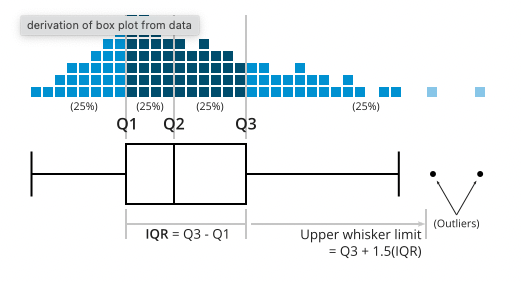

In [ ]:
box, ax = plt.subplots(figsize=(10, 6))
ax = sns.boxplot(x='time', y='total_bill', data=tips)
ax.set_title('Total Bill by Time of Day')
ax.set_xlabel('Time of Day')
ax.set_ylabel('Total Bill')
ax.set_yticks(range(0, 60, 4))
ax.grid()
plt.show()

Box plots are useful, but they do not give any visual insight into the distribution of points on the graph.  A violin plot is similar to the box plot, but shows the data distribution as a density function (hence the violin shape) that gives more insight into the number of values at a particular value (here, the amount of bill).

In [ ]:
violin, ax = plt.subplots(figsize=(10, 6))
ax = sns.violinplot(x='time', y='total_bill', data=tips)
ax.set_title('Total Bill by Time of Day - Violin Plot')
ax.set_xlabel('Time of Day')
ax.set_ylabel('Total Bill')
plt.show()

## Looking at Multiple Variables Together ##

We are going to color code dots on our plot by sex, so create a column with a color code based upon the value of sex.

In [ ]:
tips['sex_color'] = tips['sex'].apply(lambda x: 'r' if x == 'Female' else 'b')

In [ ]:
tips

We will now show serveral different views of the data on a single figure.

In [ ]:
# set the figure size big enough to show the subplots; note we are saving the figure object reference to use later
fig = plt.figure(figsize=(30, 20))

# now, within the larger figure, add subplots for each dataset.  
# We are going to have a 2 x 2 grid of graphs and they are numbered from top-left to bottom-right
# Each time we create a subplot, we are going to get an `axes` object so we can address that particular subplot
axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

# plot each of the 4 datasets in the appropriate subplot
fontsize = 16

# plot 1
axes1.plot(tips['total_bill'], tips['tip'], 'o')
axes1.set_title('Dot Plot', fontsize=fontsize + 4)
axes1.set_xlabel('Total Bill', fontsize=fontsize)
axes1.set_ylabel('Tips', fontsize=fontsize)

# plot 2
axes2.scatter(tips['total_bill'], tips['tip'])
axes2.set_title('Scatter', fontsize=fontsize + 4)
axes2.set_xlabel('Total Bill', fontsize=fontsize)
axes2.set_ylabel('Tips', fontsize=fontsize)

# plot 3
# set the color of the dot based upon sex and the size of the dot based upon party size
axes3.scatter(tips['total_bill'], tips['tip'], c=tips['sex_color'], s=tips['size'] * 30)
axes3.set_title('Scatter Plot - Sex (color) and Party Size (size)', fontsize=fontsize + 4)
axes3.set_xlabel('Total Bill', fontsize=fontsize)
axes3.set_ylabel('Tips', fontsize=fontsize)

# plot 4
# for axes 4, use sns regplot to plot a scatterplot and also produce a regression line on the data
sns.regplot(x='total_bill', y='tip', data=tips, ax=axes4)
axes4.set_title('SNS Scatter Plot with Regression Line', fontsize=fontsize + 4)
axes4.set_xlabel('Total Bill', fontsize=fontsize)
axes4.set_ylabel('Tips', fontsize=fontsize)

# set the title for the overall figure
fig.suptitle('Total Bill and Tip', fontsize=fontsize + 8)

plt.show()

### But does it work with lists?

All the examples so far have used a Pandas dataframe for the base data.

Fortunately, the `matplotlib` and `Seaborn` libraries both accept "list-like" inputs, so the methods work as expected if simple lists are supplied.

Let's demonstrate this.

### Demonstrating by extracting lists from the Pandas dataframe

Firs, we extract the data lists directly from the Pandas dataframe

In [ ]:
tips.head()

In [ ]:
total_bill_list = tips['total_bill'].tolist()
total_bill_list[0:5]

In [ ]:
tip_list = tips['tip'].tolist()
tip_list[0:5]

In [ ]:
sex_list = tips['sex_color'].tolist()
sex_list[0:5]

In [ ]:
size_list = tips['size'].tolist()
size_list[0:5]

We have to set the explicit sizes in the list in order to pass the list to Seaborn (in a later cell).  

Previously, we scaled the size of the party by mutliplying the size by 30, so we will do that again here.

In [ ]:
size_list = list(map(lambda x:x * 30, size_list))
size_list[0:5]

Now, we will build the same figure as before, but use the lists as inputs.  

Note that this code is essentially the same as the previous figure code, but changes the parameters to the plot routines to use the lists as data rather than using the Pandas dataframe.

In [ ]:
# set the figure size big enough to show the subplots; note we are saving the figure object reference to use later
fig = plt.figure(figsize=(30, 20))

# now, within the larger figure, add subplots for each dataset.  
# We are going to have a 2 x 2 grid of graphs and they are numbered from top-left to bottom-right
# Each time we create a subplot, we are going to get an `axes` object so we can address that particular subplot
axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

# plot each of the 4 datasets in the appropriate subplot
fontsize = 16

# plot 1  ---- CHANGED TO USE LISTS
axes1.plot(total_bill_list, tip_list, 'o')
axes1.set_title('Dot Plot', fontsize=fontsize + 4)
axes1.set_xlabel('Total Bill', fontsize=fontsize)
axes1.set_ylabel('Tips', fontsize=fontsize)

# plot 2 ---- CHANGED TO USE LISTS
axes2.scatter(total_bill_list, tip_list)
axes2.set_title('Scatter', fontsize=fontsize + 4)
axes2.set_xlabel('Total Bill', fontsize=fontsize)
axes2.set_ylabel('Tips', fontsize=fontsize)

# plot 3 ---- CHANGED TO USE LISTS
# set the color of the dot based upon sex and the size of the dot based upon party size
axes3.scatter(total_bill_list, tip_list, c=sex_list, s=size_list)
axes3.set_title('Scatter Plot - Sex (color) and Party Size (size)', fontsize=fontsize + 4)
axes3.set_xlabel('Total Bill', fontsize=fontsize)
axes3.set_ylabel('Tips', fontsize=fontsize)

# plot 4 ---- CHANGED TO USE LISTS
# for axes 4, use sns regplot to plot a scatterplot and also produce a regression line on the data
sns.regplot(x=total_bill_list, y=tip_list, ax=axes4)
axes4.set_title('SNS Scatter Plot with Regression Line', fontsize=fontsize + 4)
axes4.set_xlabel('Total Bill', fontsize=fontsize)
axes4.set_ylabel('Tips', fontsize=fontsize)

# set the title for the overall figure
fig.suptitle('Total Bill and Tip', fontsize=fontsize + 8)

plt.show()

### Demonstrating with random data

We can also demonstrate by generating some random data.

First, we will generate some random data to simulate the total bill and tip values and store those values in lists.

In [ ]:
import random
sample_size = 20
total_bill_list = [random.uniform(5, 60) for i in range(sample_size)]
total_bill_list

In [ ]:
tip_list = [random.uniform(1, 10) for i in range(sample_size)]
tip_list

One of our sample graphs above used colors for the sex and set the size of the dot based upon the size of the dinner party.

To produce a similar graph, we will generate a list of random colors and random sizes.  

Note that this is not using the actual data to set the color values.  We are simply setting random color values.

In [ ]:
sex_list = [random.choice(['r', 'b']) for i in range(sample_size)]
sex_list

Now, we generate the random party size (i.e., we are not using the original data) and applying the scaling (i.e., multiplying by 30) at the same time.

In [ ]:
size_list = [random.randint(1, 6) * 30 for i in range(sample_size)]
size_list

Rerun the "list" version of the figure with our random data.

Repeating all this code in different cells is a pain (and error prone)!  We should have made a function to do this!  😀

In [ ]:
# set the figure size big enough to show the subplots; note we are saving the figure object reference to use later
fig = plt.figure(figsize=(30, 20))

# now, within the larger figure, add subplots for each dataset.  
# We are going to have a 2 x 2 grid of graphs and they are numbered from top-left to bottom-right
# Each time we create a subplot, we are going to get an `axes` object so we can address that particular subplot
axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

# plot each of the 4 datasets in the appropriate subplot
fontsize = 16

# plot 1  ---- CHANGED TO USE LISTS
axes1.plot(total_bill_list, tip_list, 'o')
axes1.set_title('Dot Plot', fontsize=fontsize + 4)
axes1.set_xlabel('Total Bill', fontsize=fontsize)
axes1.set_ylabel('Tips', fontsize=fontsize)

# plot 2 ---- CHANGED TO USE LISTS
axes2.scatter(total_bill_list, tip_list)
axes2.set_title('Scatter', fontsize=fontsize + 4)
axes2.set_xlabel('Total Bill', fontsize=fontsize)
axes2.set_ylabel('Tips', fontsize=fontsize)

# plot 3 ---- CHANGED TO USE LISTS
# set the color of the dot based upon sex and the size of the dot based upon party size
axes3.scatter(total_bill_list, tip_list, c=sex_list, s=size_list)
axes3.set_title('Scatter Plot - Sex (color) and Party Size (size)', fontsize=fontsize + 4)
axes3.set_xlabel('Total Bill', fontsize=fontsize)
axes3.set_ylabel('Tips', fontsize=fontsize)

# plot 4 ---- CHANGED TO USE LISTS
# for axes 4, use sns regplot to plot a scatterplot and also produce a regression line on the data
sns.regplot(x=total_bill_list, y=tip_list, ax=axes4)
axes4.set_title('SNS Scatter Plot with Regression Line', fontsize=fontsize + 4)
axes4.set_xlabel('Total Bill', fontsize=fontsize)
axes4.set_ylabel('Tips', fontsize=fontsize)

# set the title for the overall figure
fig.suptitle('Total Bill and Tip', fontsize=fontsize + 8)

plt.show()

### Another Multi-part Figure

Here is another example of providing several views of the data in a single figure.  

We will go back to using the tips dataframe for these examples.

Since the total bill and the tips are in dollars and cents, we will bin the values into buckets to count them.  Define the bins for each.

In [ ]:
tips

In [ ]:
bill_bins_to_use = range(0, 60, 5)

tip_bins_to_use = range(0, 10)

Now, make a 4 part figure with several views of the two variables together.  In this case, we use the Seaborn library to construct each component graph.

In [ ]:
fig = plt.figure(figsize=(30, 20))

fontsize = 16
fig.suptitle('Tips and Total Bill Comparison', fontsize=fontsize + 8)
fig.fontsize = fontsize

axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

# plot 1
sns.histplot(data=tips, x='total_bill', hue='sex', bins=bill_bins_to_use, ax=axes1)
axes1.set_title('Frequency of Total Bill Values', fontsize=fontsize + 4)
axes1.grid()
axes1.set_yticks(ticks=range(0, 50, 5))
axes1.set_xlabel('Total Bill', fontsize=fontsize)
axes1.set_ylabel('Count', fontsize=fontsize)

# plot 2
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex', ax=axes2)
axes2.set_title('Tips by Total Bill', fontsize=fontsize + 4)
axes2.set_xlabel('Total Bill', fontsize=fontsize)
axes2.set_ylabel('Tip', fontsize=fontsize)

# plot 3
sns.kdeplot(data=tips, x='total_bill', y='tip', shade=True, color='g', hue=None, ax=axes3)
axes3.set_title('Density Function of Total Bill and Tips', fontsize=fontsize + 4)
axes3.set_xlabel('Total Bill', fontsize=fontsize)
axes3.set_ylabel('Tip', fontsize=fontsize)

# plot 4
sns.histplot(data=tips, x='tip', hue='sex', bins=tip_bins_to_use, ax=axes4)
axes4.set_title('Frequency of Tip Values', fontsize=fontsize + 4)
axes4.grid()
axes4.set_yticks(ticks=range(0, 50, 5))
axes4.set_xlabel('Tip', fontsize=fontsize)
axes4.set_ylabel('Count', fontsize=fontsize)

plt.show()

Let's check our graph results.

First, use the Pandas `value_counts` method, specifying the bins used to count.  We will take a look at the total bill, but we could the same thing for the tip value.

In [ ]:
tips.groupby('sex')['total_bill'].value_counts(bins=bill_bins_to_use).sort_index()

Note the counts for female patrons in the (20.0, 25.0] range and in the (25.0, 30.0] range.

Now, look back at the graph.

What happened here?

In [ ]:
tips[(tips['total_bill'] == 25.0) & (tips['sex'] == 'Female')]

There is one observation where the total bill is exactly $25.00, right on the border between 2 bins.  

Our graph included this count in the range [25.0, 30.0), but the `value_counts` method included the count in (20.0, 25.0] (note the brackets).

We can use the Pandas `cut` function to be more specific on the binning of border cases.  By default, `cut` acts like `value_counts` and includes the bottom value of the bin, but not the top.

In [ ]:
tips.groupby([pd.cut( tips['total_bill'], bill_bins_to_use), 'sex'])['total_bill'].count()

We can modify this behavior by setting the `right` parameter to `False`.  Now, the bin counts will include the lower bound values, but exclude the upper bound, just as the histogram did.

In [ ]:
tips.groupby([pd.cut( tips['total_bill'], bill_bins_to_use, right=False), 'sex'])['total_bill'].count()